In [8]:
from scipy.signal import StateSpace
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Parameters

n = 1000
d_x = 2
d_y = 5
dt = 0.01

rng = np.random.default_rng(0)


# Initialze State-Space Matrices
A = np.array([[0.9, -0.2],
              [0.2,  0.8]])

C = np.random.randn(d_y, d_x)
B = np.zeros((d_x, 1))
D = np.zeros((d_y, 1))


# Define the Discrete-Time State-Space System
sys = StateSpace(A, B, C, D, dt=dt)

rng = np.random.default_rng(0)


# Noise levels
epsilon_t = 0.1  # process noise
heta_t = 0.2  # observation noise


# Allocate arrays
x = np.zeros((n, d_x))  # state trajectory
y = np.zeros((n, d_y))  # observed time series

# Initial state
x[0] = rng.normal(size=d_x)


# Simulating the system 

for t in range(1, n):
    x[t] = A @ x[t-1] +  epsilon_t * rng.normal(size=d_x)
    y[t] = C @ x[t]   + heta_t * rng.normal(size=d_y)



# Spectral radius 
print("Spectral radius:", np.max(np.abs(np.linalg.eigvals(A))))

# Shapes
print("x shape:", x.shape)
print("y shape:", y.shape)



Spectral radius: 0.8717797887081348
x shape: (1000, 2)
y shape: (1000, 5)


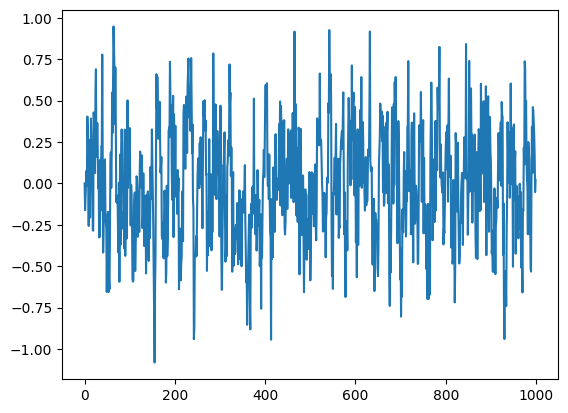

In [10]:
plt.plot(y[:,1])